2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      1.00      0.70      2498
       Relay       0.00      0.00      0.00      2166

    accuracy                           0.54      4664
   macro avg       0.27      0.50      0.35      4664
weighted avg       0.29      0.54      0.37      4664



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

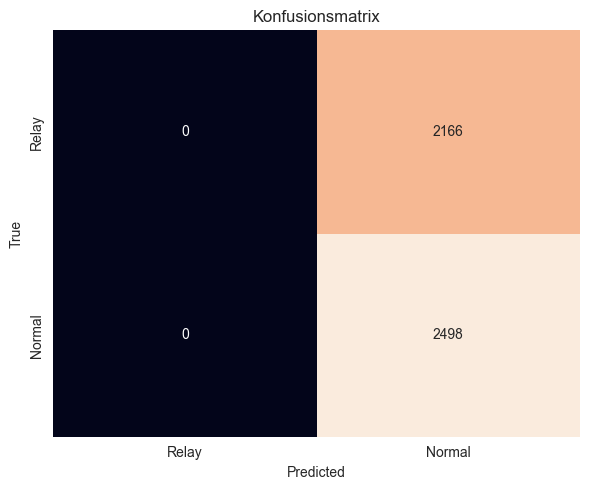

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.73      0.53      0.61      2498
       Relay       0.59      0.77      0.67      2166

    accuracy                           0.64      4664
   macro avg       0.66      0.65      0.64      4664
weighted avg       0.66      0.64      0.64      4664



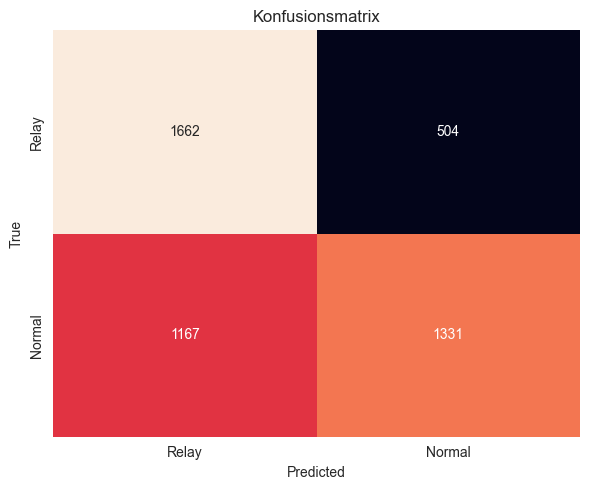

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.79      0.52      0.63      2498
       Relay       0.60      0.84      0.70      2166

    accuracy                           0.67      4664
   macro avg       0.70      0.68      0.67      4664
weighted avg       0.70      0.67      0.66      4664



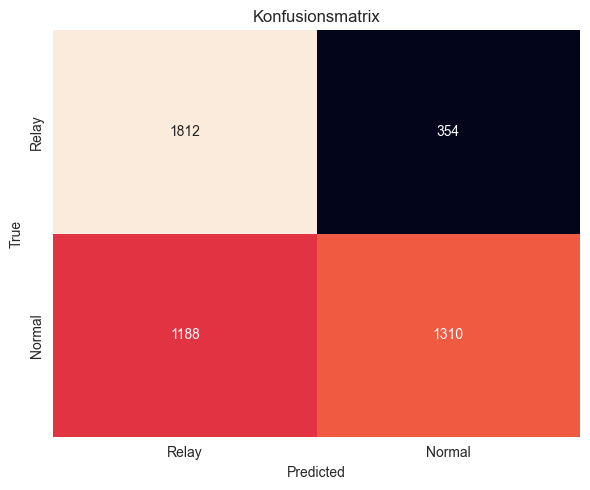

6

Classification Report:
               precision    recall  f1-score   support

      Normal       0.83      0.53      0.65      2498
       Relay       0.62      0.87      0.72      2166

    accuracy                           0.69      4664
   macro avg       0.72      0.70      0.69      4664
weighted avg       0.73      0.69      0.68      4664



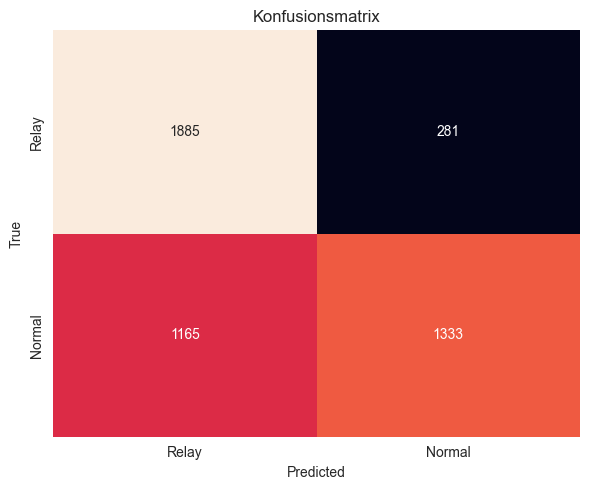

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.83      0.53      0.64      2498
       Relay       0.62      0.88      0.72      2166

    accuracy                           0.69      4664
   macro avg       0.72      0.70      0.68      4664
weighted avg       0.73      0.69      0.68      4664



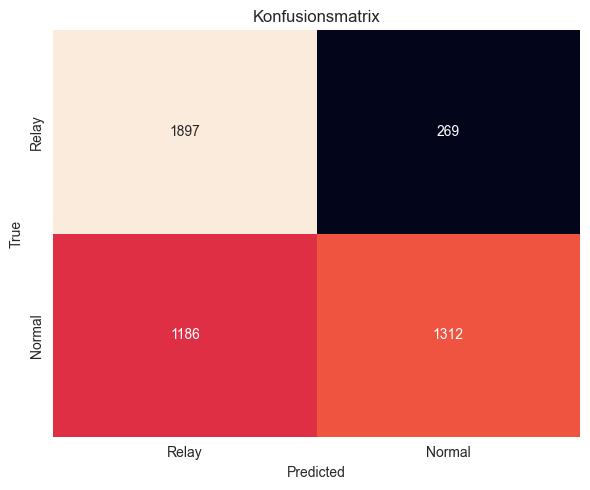

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.83      0.52      0.64      2498
       Relay       0.61      0.88      0.72      2166

    accuracy                           0.69      4664
   macro avg       0.72      0.70      0.68      4664
weighted avg       0.73      0.69      0.68      4664



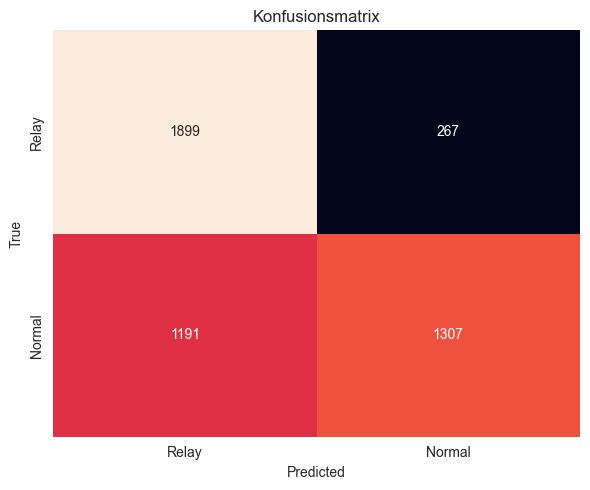

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.82      0.52      0.64      2498
       Relay       0.61      0.87      0.72      2166

    accuracy                           0.68      4664
   macro avg       0.72      0.69      0.68      4664
weighted avg       0.72      0.68      0.67      4664



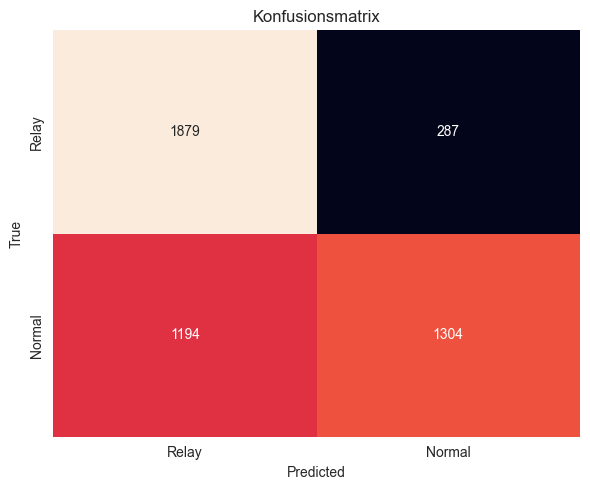

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {2, 3, 4, 6, 10, 15, 30}:
    clf = ABOD(contamination=len(X_test_relay)/len(X_test_combined), n_neighbors=n, method="fast")
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      1.00      0.70      2498
       Relay       0.00      0.00      0.00      2166

    accuracy                           0.54      4664
   macro avg       0.27      0.50      0.35      4664
weighted avg       0.29      0.54      0.37      4664



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

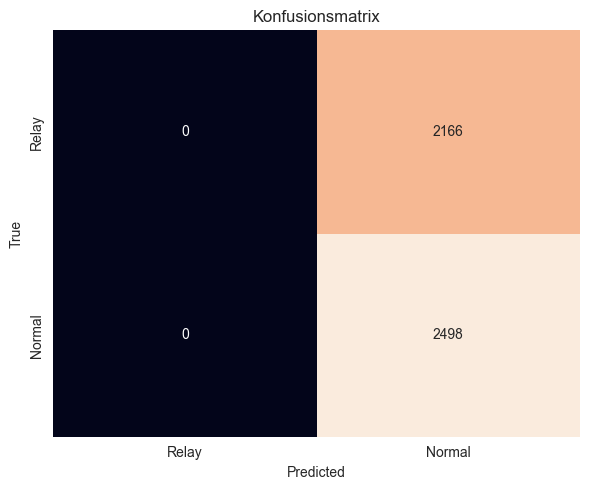

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.51      0.54      2498
       Relay       0.51      0.59      0.55      2166

    accuracy                           0.55      4664
   macro avg       0.55      0.55      0.55      4664
weighted avg       0.55      0.55      0.55      4664



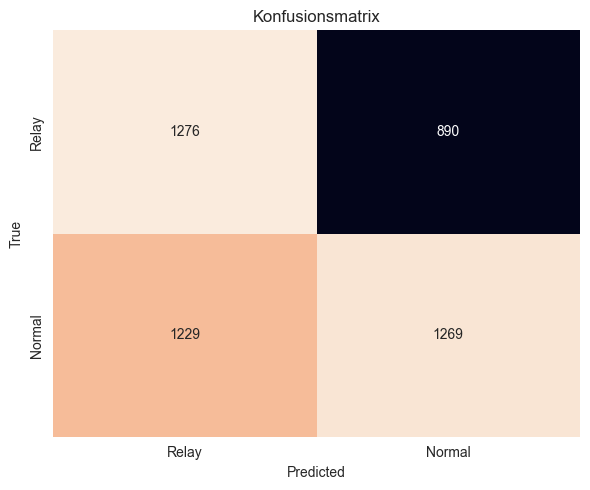

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.51      0.56      2498
       Relay       0.52      0.61      0.56      2166

    accuracy                           0.56      4664
   macro avg       0.56      0.56      0.56      4664
weighted avg       0.57      0.56      0.56      4664



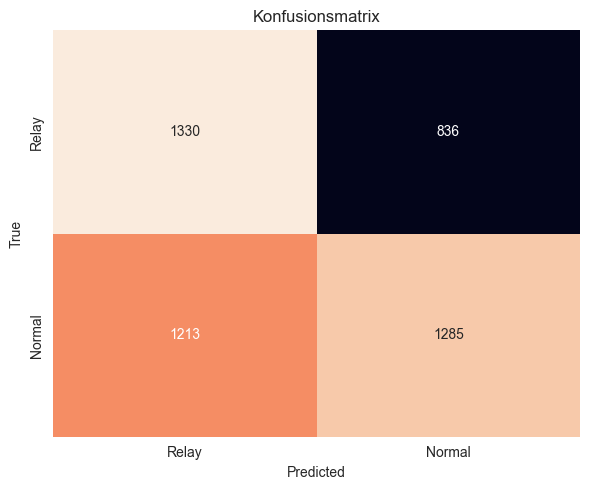

6

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.51      0.56      2498
       Relay       0.53      0.62      0.57      2166

    accuracy                           0.56      4664
   macro avg       0.57      0.57      0.56      4664
weighted avg       0.57      0.56      0.56      4664



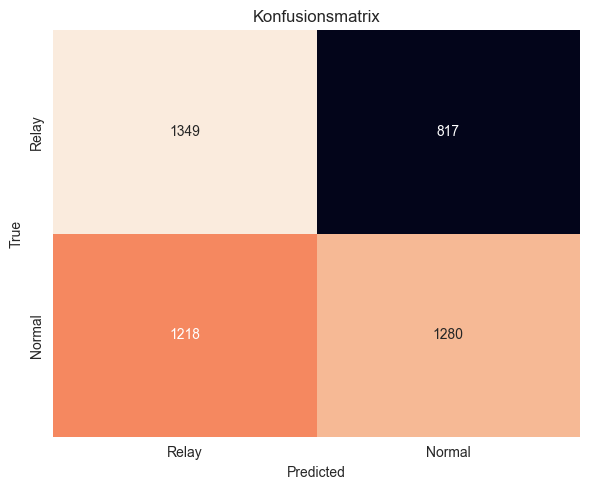

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.51      0.55      2498
       Relay       0.52      0.61      0.56      2166

    accuracy                           0.56      4664
   macro avg       0.56      0.56      0.56      4664
weighted avg       0.57      0.56      0.56      4664



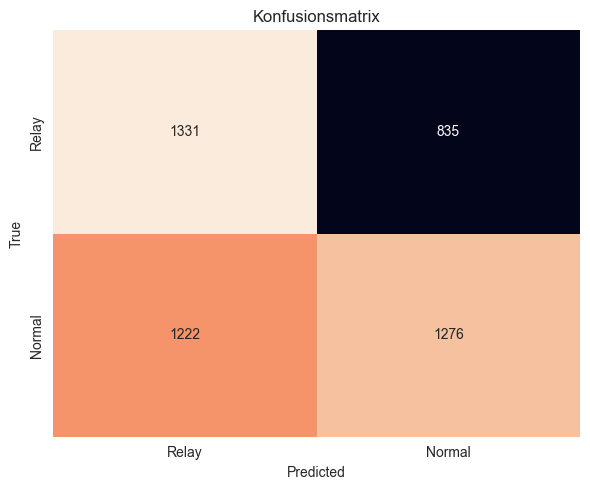

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.51      0.55      2498
       Relay       0.52      0.62      0.57      2166

    accuracy                           0.56      4664
   macro avg       0.57      0.57      0.56      4664
weighted avg       0.57      0.56      0.56      4664



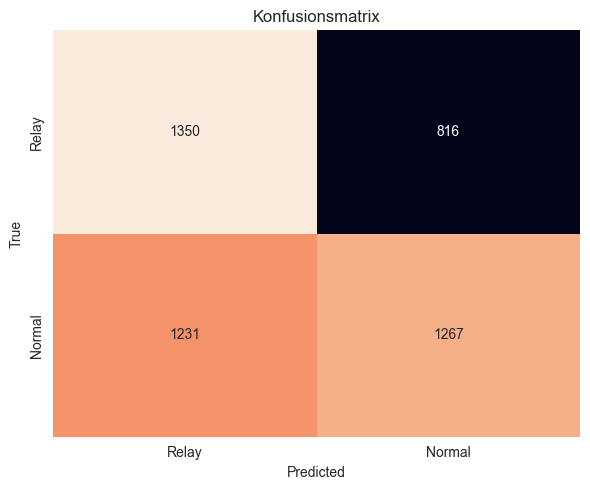

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.51      0.55      2498
       Relay       0.52      0.61      0.56      2166

    accuracy                           0.55      4664
   macro avg       0.56      0.56      0.55      4664
weighted avg       0.56      0.55      0.55      4664



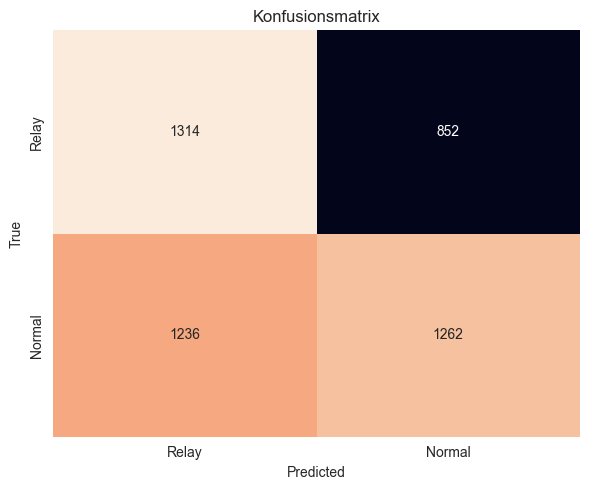

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {2, 3, 4, 6, 10, 15, 30}:
    clf = ABOD(contamination=len(X_test_relay)/len(X_test_combined), n_neighbors=n, method="fast")
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      1.00      0.70      2498
       Relay       0.00      0.00      0.00      2166

    accuracy                           0.54      4664
   macro avg       0.27      0.50      0.35      4664
weighted avg       0.29      0.54      0.37      4664



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

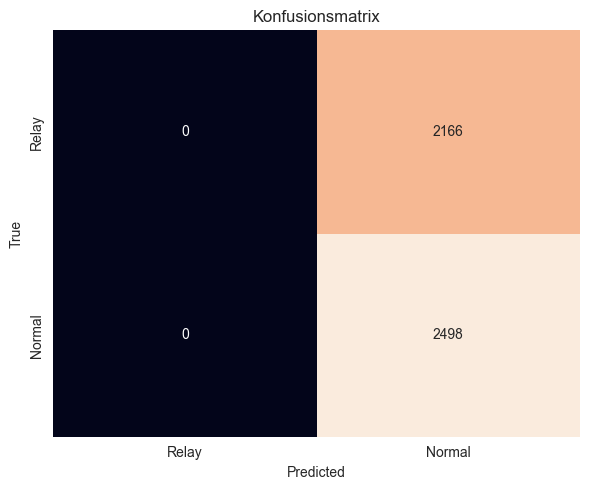

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.78      0.05      0.09      2166

    accuracy                           0.55      4664
   macro avg       0.66      0.52      0.39      4664
weighted avg       0.65      0.55      0.42      4664



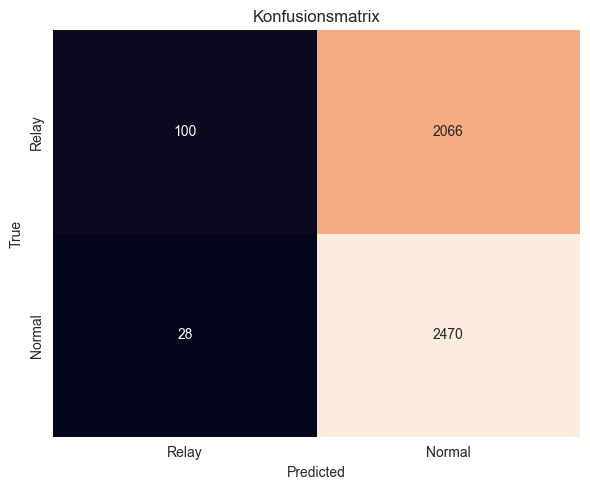

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2498
       Relay       0.91      0.12      0.21      2166

    accuracy                           0.58      4664
   macro avg       0.74      0.55      0.46      4664
weighted avg       0.72      0.58      0.48      4664



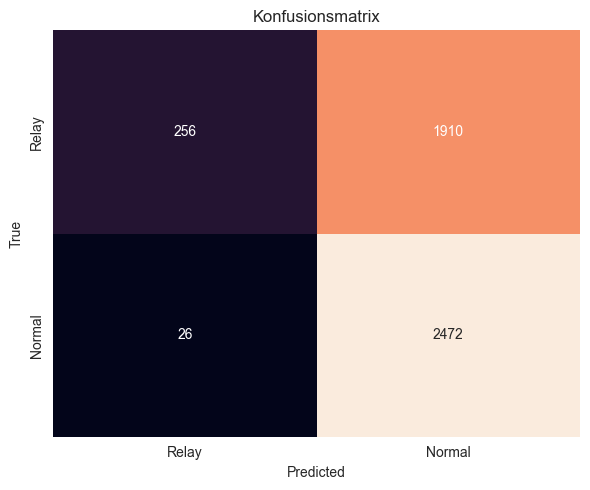

6

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.73      2498
       Relay       0.91      0.15      0.26      2166

    accuracy                           0.60      4664
   macro avg       0.74      0.57      0.49      4664
weighted avg       0.73      0.60      0.51      4664



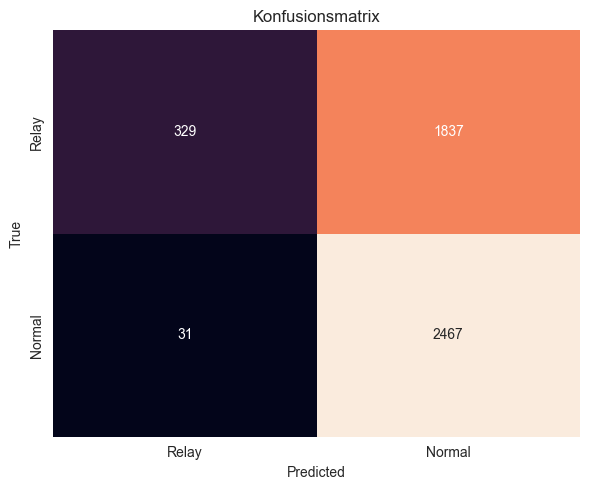

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.91      0.18      0.30      2166

    accuracy                           0.61      4664
   macro avg       0.75      0.58      0.51      4664
weighted avg       0.73      0.61      0.53      4664



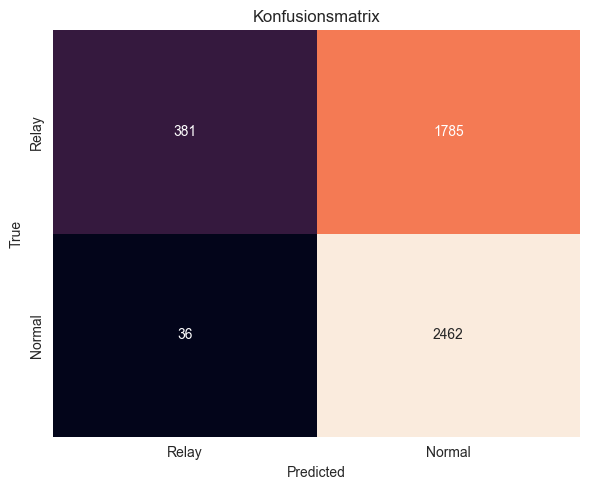

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.92      0.19      0.31      2166

    accuracy                           0.61      4664
   macro avg       0.75      0.59      0.52      4664
weighted avg       0.74      0.61      0.54      4664



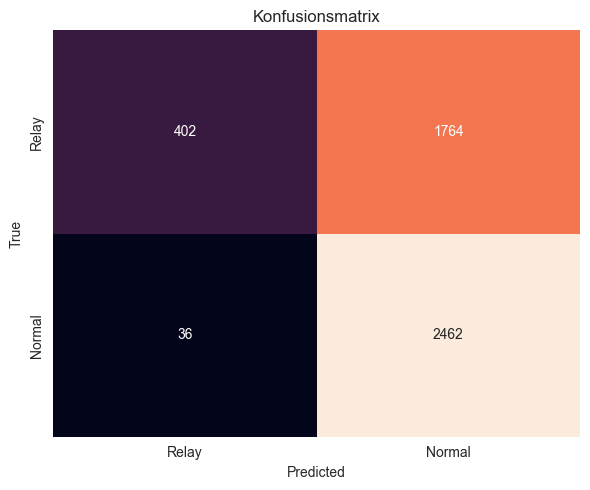

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.92      0.19      0.31      2166

    accuracy                           0.62      4664
   macro avg       0.75      0.59      0.52      4664
weighted avg       0.74      0.62      0.54      4664



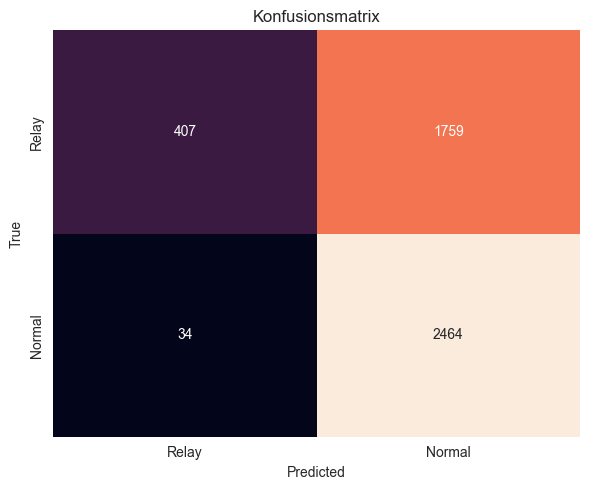

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {2, 3, 4, 6, 10, 15, 30}:
    clf = ABOD(contamination=0.01, n_neighbors=n, method="fast")
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.93      0.18      0.31      2166

    accuracy                           0.61      4664
   macro avg       0.76      0.59      0.52      4664
weighted avg       0.74      0.61      0.53      4664



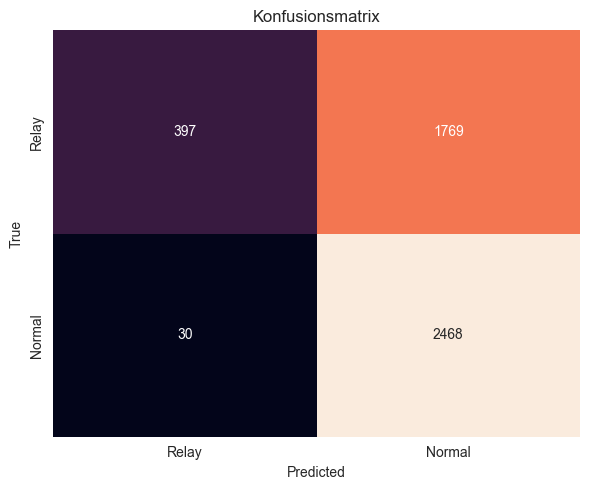

35

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.93      0.18      0.31      2166

    accuracy                           0.61      4664
   macro avg       0.76      0.59      0.52      4664
weighted avg       0.74      0.61      0.54      4664



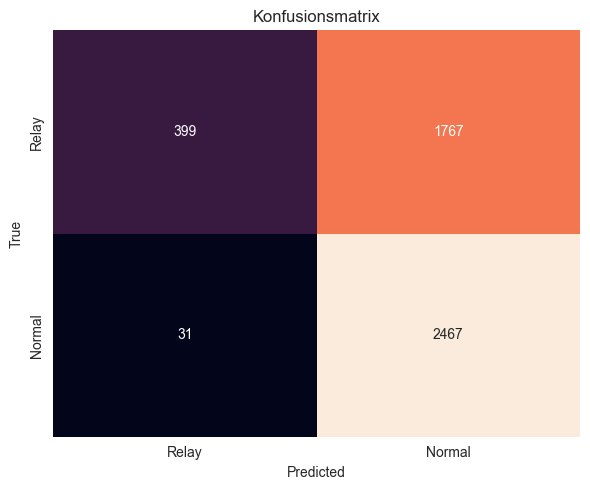

100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.93      0.18      0.30      2166

    accuracy                           0.61      4664
   macro avg       0.76      0.58      0.51      4664
weighted avg       0.74      0.61      0.53      4664



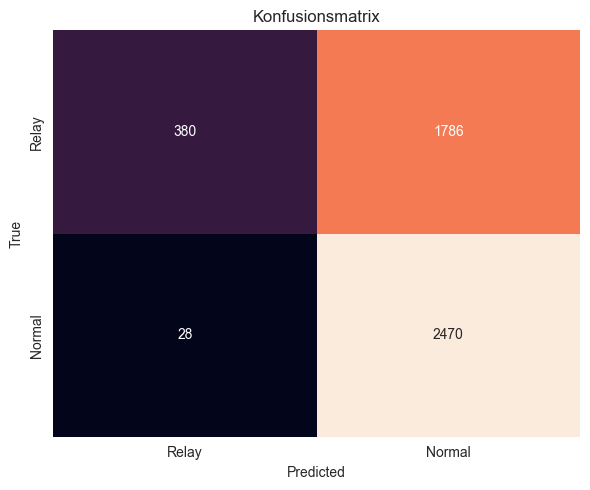

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {35, 50 , 100}:
    clf = ABOD(contamination=0.01, n_neighbors=n, method="fast")
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()